# Train the forward and inverse model and plot the results

## Imports

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import data_handler as dh
from src.utils import plotter as pl
from train_forward_model import forward_training
from train_inverse_model import inverse_training

## Load forward training set

In [2]:
direct_dataset_path = '/Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/Data/csv/filtered_real_world_data1.csv'
direct_dataset = dh.load_csv(direct_dataset_path)

## Check for NaN's in data

In [3]:
if(direct_dataset.isnull().values.any() == False):
    print("There are no NaNs in the data")

There are no NaNs in the data


In [4]:
# Replacing infinite with NaN
direct_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropping all the rows with nan values
direct_dataset.dropna(inplace=True)

## Plot the data that will be used in training and validation

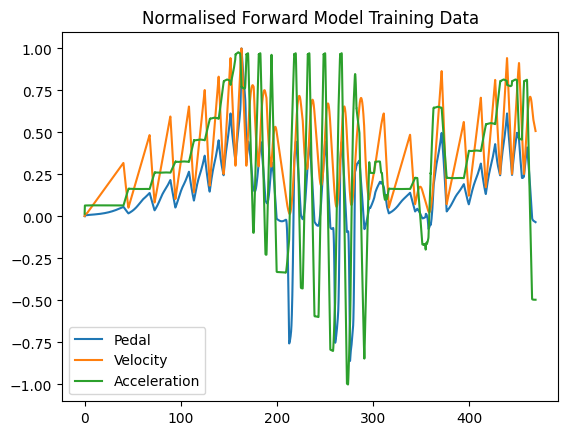

In [5]:
plt.plot(direct_dataset)
plt.title('Normalised Forward Model Training Data')
plt.legend(['Pedal' , 'Velocity' , 'Acceleration'])
plt.savefig('/Users/francescomaraschin/Desktop/norm_Training_Data.svg')
plt.show()

## Train the forward model

In [6]:
[ forward_model,
  forward_history,
  forward_train_data,
  forward_valid_data,
  time,
  batch_size] = forward_training(direct_dataset)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-05-19 16:23:14.858249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-19 16:23:14.858765: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-05-19 16:23:14.865942: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-05-19 16:23:14.874574: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-19 16:23:14.882477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:14.922363: I tensorflow/core/grappler/optimizers/custom_graph

Model: "custom_activation_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_vx (InputLayer)          [(100, 10)]          0           []                               
                                                                                                  
 input_p (InputLayer)           [(100, 10)]          0           []                               
                                                                                                  
 activated_pedal_0 (ActivLin1D)  (100, 10)           0           ['input_vx[0][0]',               
                                                                  'input_p[0][0]']                
                                                                                                  
 activated_pedal_1 (ActivLin1D)  (100, 10)           0           ['input_vx[

2023-05-19 16:23:15.470010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:15.477657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:15.485834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:15.494203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:15.502568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


                                                                  'tf_op_layer_add_8[0][0]',      
                                                                  'tf_op_layer_add_9[0][0]']      
                                                                                                  
 negative_ReLU (ReLU)           (100, 14)            0           ['weighted_vel_network[0][0]']   
                                                                                                  
 acceleration (Dense)           (100, 14)            910         ['add_outputs_of_neural_layers[0]
                                                                 [0]']                            
                                                                                                  
 tf_op_layer_Neg (TensorFlowOpL  [(100, 14)]         0           ['negative_ReLU[0][0]']          
 ayer)                                                                                            
          

2023-05-19 16:23:16.166958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:16.211215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:16.253829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8100/8300 [============================>.] - ETA: 0s - loss: 0.0574

/Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/NN_Python/venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-05-19 16:23:21.711718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: loss improved from inf to 0.05686, saving model to /Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/Data/trained_models/forward_model/forward_model.h5


2023-05-19 16:23:22.311464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:22.321284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:22.332573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:22.346169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:22.358189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:22.368063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:23:22.378033: I tensorflow/core/grappler/optimizers/cust

8300/8300 [==============================] - 6s 772us/sample - loss: 0.0569 - val_loss: 0.0318
Epoch 2/200
8300/8300 [==============================] - ETA: 0s - loss: 0.0394
Epoch 2: loss improved from 0.05686 to 0.03936, saving model to /Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/Data/trained_models/forward_model/forward_model.h5
8300/8300 [==============================] - 2s 266us/sample - loss: 0.0394 - val_loss: 0.0297
Epoch 3/200
8300/8300 [==============================] - ETA: 0s - loss: 0.0353
Epoch 3: loss improved from 0.03936 to 0.03531, saving model to /Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/Data/trained_models/forward_model/forward_model.h5
8300/8300 [==============================] - 2s 250us/sample - loss: 0.0353 - val_loss: 0.0275
Epoch 4/200
8200/8300 [============================>.] - ETA: 0s - loss

2023-05-19 16:30:06.947407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:30:07.032820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:30:07.079442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:30:07.252557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:30:07.307381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:30:07.349869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:30:07.446227: I tensorflow/core/grappler/optimizers/cust

## Plot the trained forward model

/Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/NN_Python/venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-05-19 16:33:24.961567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


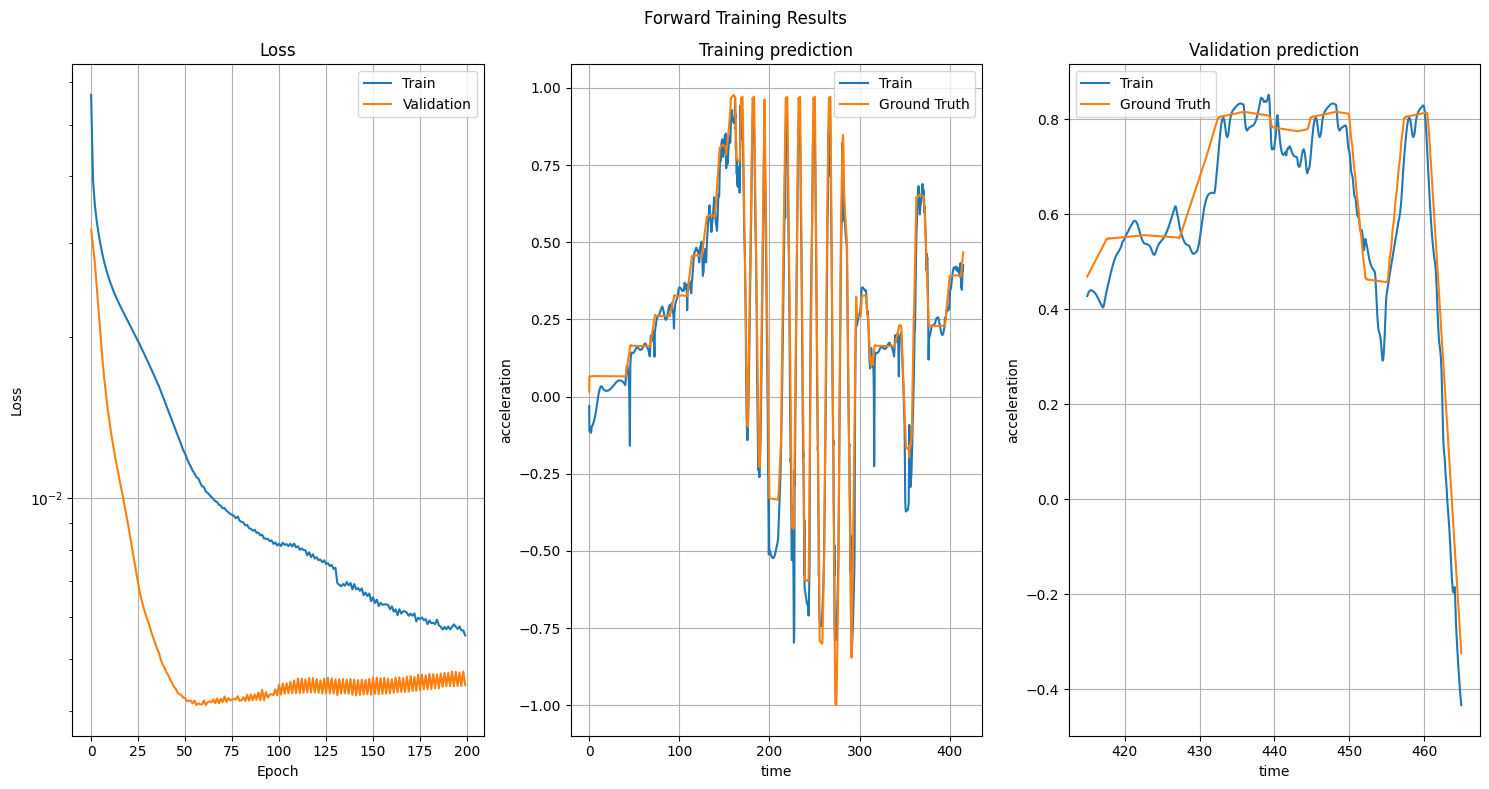

In [7]:
pl.results(model      = forward_model,
           history    = forward_history,
           dataset    = [forward_train_data,
                         forward_valid_data],
           time       =  time,
           batch_size = batch_size,
           title      = 'Forward Training Results',
           location   = '/Users/francescomaraschin/Desktop/Forward_Training_Results.svg',
           mode       = "acceleration")

## Calculate accelerations from trained forward model:

In [8]:
calculated_accelerations_1 = forward_model.predict(forward_train_data[0])
calculated_accelerations_2 = forward_model.predict(forward_valid_data[0])

calculated_accelerations = np.concatenate([calculated_accelerations_1 , calculated_accelerations_2])

In [9]:
# Get actual acc data from csv without time data as index, for comparison to prediced acc
acc_data = pd.read_csv(filepath_or_buffer=direct_dataset_path,
                          index_col=False,
                          dtype=np.float32) # to make TF happy
acc_data = acc_data['acceleration']

## Plot comparison between actual and predicted accelerations from forward model:

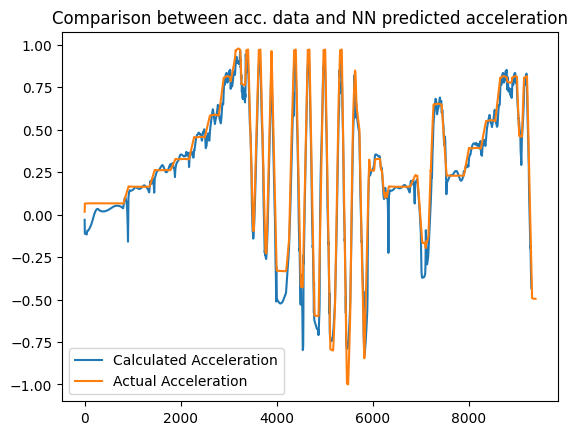

In [10]:
plt.plot(calculated_accelerations)
plt.plot(acc_data)
plt.title('Comparison between acc. data and NN predicted acceleration')
plt.legend(['Calculated Acceleration','Actual Acceleration'])

## Create input dataset for the inverse model using acc data created by forward model:

In [11]:
# Use the same time as orig. dataset:
time = pd.read_csv(direct_dataset_path , usecols=['time'])
# Use the same velocity as orig. dataset:
velocity = pd.read_csv(direct_dataset_path , usecols=['velocity'])
# Use the forward model calcualted acceleration:
acceleration = pd.DataFrame(calculated_accelerations , columns= ['acceleration'])
# Use the same pedal as orig. dataset:
pedal = pd.read_csv(direct_dataset_path , usecols=['pedal'])

In [12]:
# Put everything together:
inverse_dataset = pd.concat([time , velocity, acceleration , pedal], axis=1)

# Replacing infinite with nan
inverse_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropping all the rows with nan values
inverse_dataset.dropna(inplace=True)

# Save inverse dataset to csv to be used in the comparison between the py & C++ models:
pd.DataFrame(inverse_dataset).to_csv("/Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/Data/csv/inverse.csv", header=['time','velocity','acceleration','pedal'], index=None)

inverse_dataset = inverse_dataset.set_index('time')

## Train the inverse model

In [13]:
[inverse_model,
     inv_history,
     inv_train_data,
     inv_valid_data,
     time,
     batch_size] = inverse_training(inverse_dataset = inverse_dataset)

2023-05-19 16:33:52.363014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:52.402746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:52.448533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:52.487863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:52.526216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:52.563398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:52.741562: I tensorflow/core/grappler/optimizers/cust

Model: "inverse_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_vx (InputLayer)          [(100, 10)]          0           []                               
                                                                                                  
 input_acc (InputLayer)         [(100, 10)]          0           []                               
                                                                                                  
 activated_acceleration_0 (Acti  (100, 10)           0           ['input_vx[0][0]',               
 vLin1D)                                                          'input_acc[0][0]']              
                                                                                                  
 activated_acceleration_1 (Acti  (100, 10)           0           ['input_vx[0][0]',   

2023-05-19 16:33:53.206587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:53.249664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Train on 8200 samples, validate on 1000 samples
Epoch 1/200


2023-05-19 16:33:53.631132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:53.696227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:53.737622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7900/8200 [===========================>..] - ETA: 0s - loss: 0.2263

/Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/NN_Python/venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-05-19 16:33:55.566073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.34090, saving model to /Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/Data/trained_models/inverse_model/inverse_model.h5


2023-05-19 16:33:55.982350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:55.998629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:56.014690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:56.042881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:56.063977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:56.082153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:56.098948: I tensorflow/core/grappler/optimizers/cust

8200/8200 [==============================] - 3s 328us/sample - loss: 0.2237 - val_loss: 0.3409
Epoch 2/200
 900/8200 [==>...........................] - ETA: 1s - loss: 3.7903e-04

2023-05-19 16:33:56.199200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:56.216184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:33:56.234154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7800/8200 [===========================>..] - ETA: 0s - loss: 0.1865
Epoch 2: val_loss improved from 0.34090 to 0.24852, saving model to /Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/Data/trained_models/inverse_model/inverse_model.h5
8200/8200 [==============================] - 1s 133us/sample - loss: 0.1825 - val_loss: 0.2485
Epoch 3/200
8000/8200 [============================>.] - ETA: 0s - loss: 0.1519
Epoch 3: val_loss improved from 0.24852 to 0.17784, saving model to /Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/Data/trained_models/inverse_model/inverse_model.h5
8200/8200 [==============================] - 1s 136us/sample - loss: 0.1494 - val_loss: 0.1778
Epoch 4/200
8100/8200 [============================>.] - ETA: 0s - loss: 0.1242
Epoch 4: val_loss improved from 0.17784 to 0.12558, saving model to /Users/francescomarasc

2023-05-19 16:37:25.504870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:37:25.573300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:37:25.613410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:37:25.779936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:37:25.859544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:37:25.901855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-19 16:37:26.006670: I tensorflow/core/grappler/optimizers/cust

## Plot the results of the trained inverse model:

/Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/NN_Python/venv/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-05-19 16:37:28.953018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


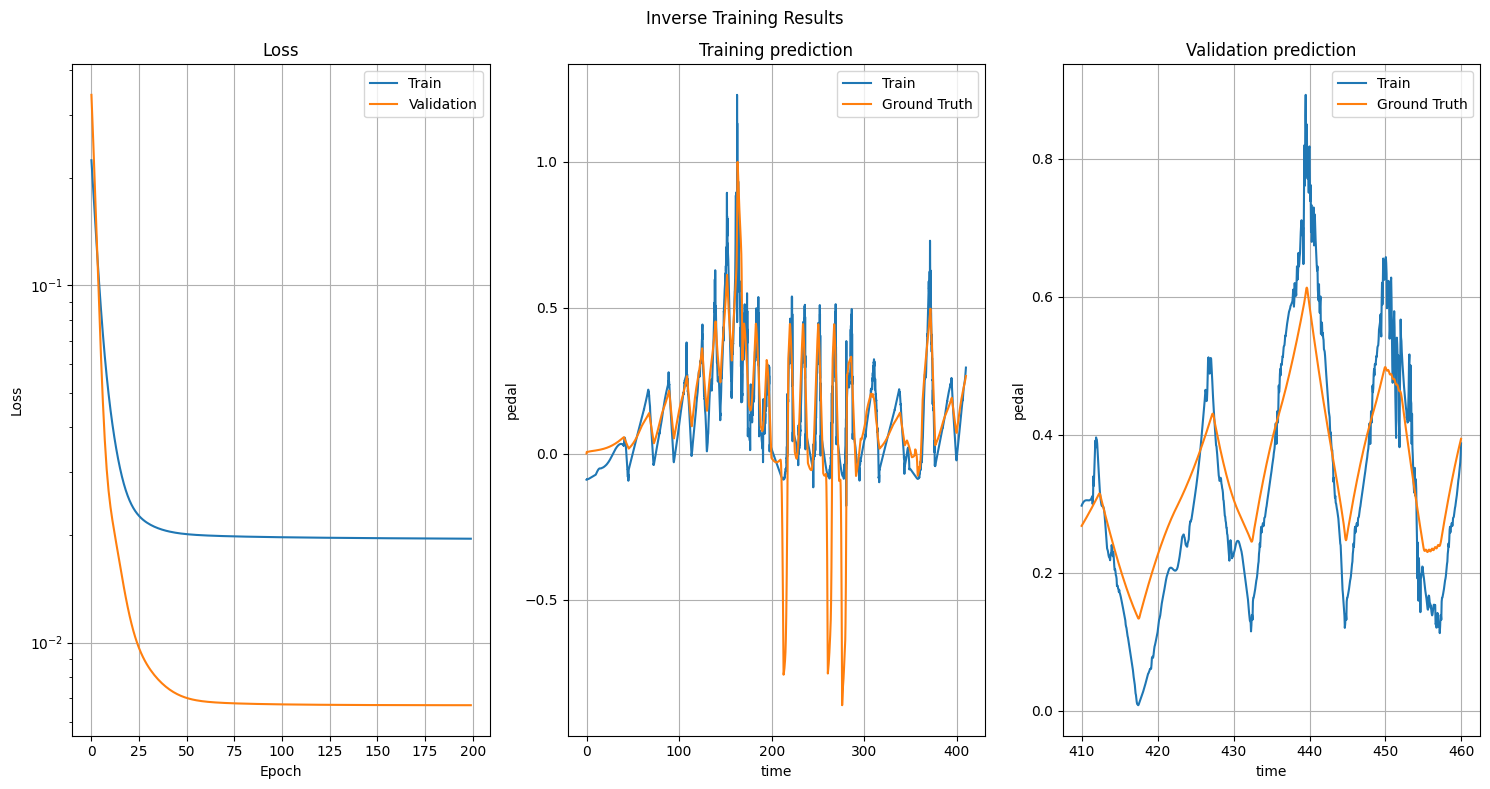

In [14]:
pl.results(model      = inverse_model,
           history    = inv_history,
           dataset    = [inv_train_data,
                         inv_valid_data],
           time       =  time,
           batch_size = batch_size,
           title      = 'Inverse Training Results',
           location   = '/Users/francescomaraschin/Desktop/Inverse_Training_Results.svg',
           mode       = "pedal")

## Plot the comparision between training data and trained output of inverse model:

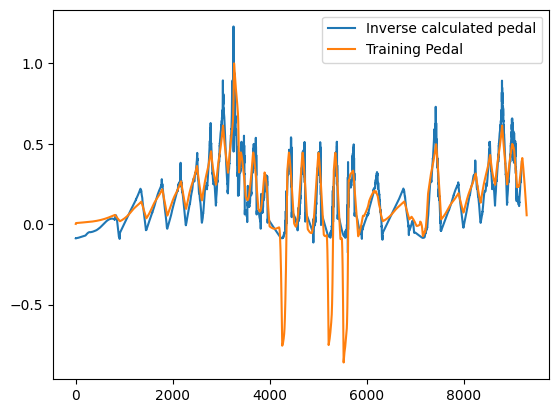

In [15]:
calculated_pedal_1 = inverse_model.predict(inv_train_data[0])
calculated_pedal_2 = inverse_model.predict(inv_valid_data[0])

calculated_pedal = np.concatenate([calculated_pedal_1 , calculated_pedal_2])

# Get actual acc data from csv without time data as index, for comparison to prediced acc
inverse_dataset_path = "/Users/francescomaraschin/Library/Mobile Documents/com~apple~CloudDocs/Universtiy/IntelligentVehicles/LongitudinalControllerNN/Data/csv/inverse.csv"
inv_pedal_data = pd.read_csv(filepath_or_buffer=inverse_dataset_path,
                          index_col=False,
                          dtype=np.float32) # to make TF happy
inv_pedal_data = inv_pedal_data['pedal']

orig_pedal_data = pd.read_csv(filepath_or_buffer=direct_dataset_path,
                          index_col=False,
                          dtype=np.float32) # to make TF happy
orig_pedal_data = orig_pedal_data['pedal']

plt.plot(calculated_pedal)
plt.plot(inv_pedal_data)
#plt.plot(orig_pedal_data)
plt.legend(['Inverse calculated pedal','Training Pedal','Original Pedal'], loc = 'best')